In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/screentime_analysis.csv')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [3]:
df.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day Of Week'] = df['Date'].dt.day_name()
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,Day Of Week
0,2024-08-07,Instagram,81,24,57,Wednesday
1,2024-08-08,Instagram,90,30,53,Thursday
2,2024-08-26,Instagram,112,33,17,Monday
3,2024-08-22,Instagram,82,11,38,Thursday
4,2024-08-12,Instagram,59,47,16,Monday


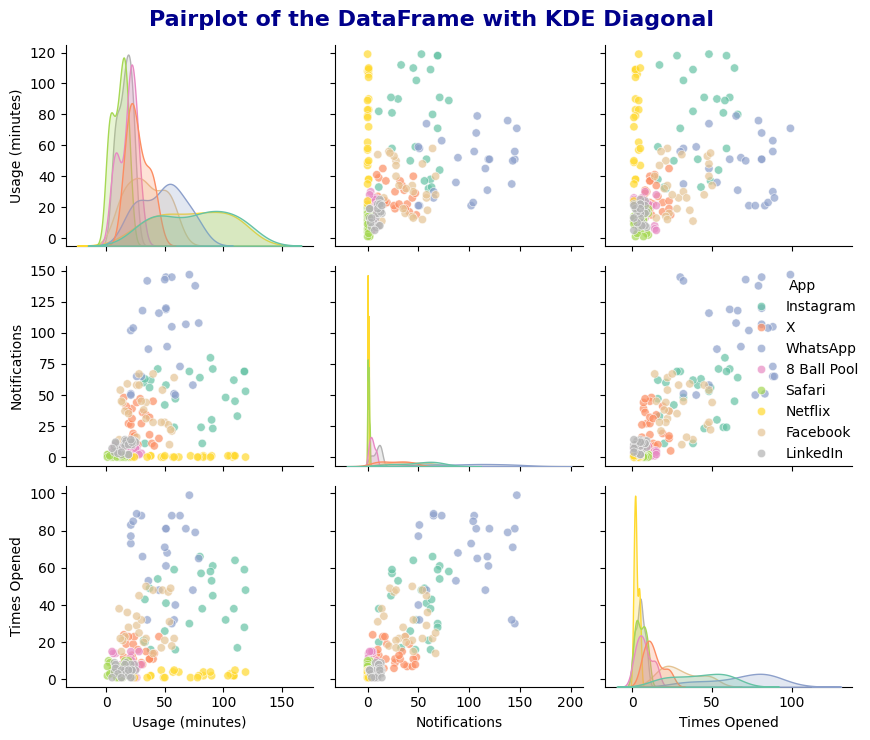

In [41]:
sns.pairplot(df, diag_kind='kde', palette='Set2', markers='o', plot_kws={'alpha': 0.7}, hue='App')

plt.suptitle('Pairplot of the DataFrame with KDE Diagonal', fontsize=16, fontweight='bold', color='darkblue')

plt.tight_layout()
plt.show()

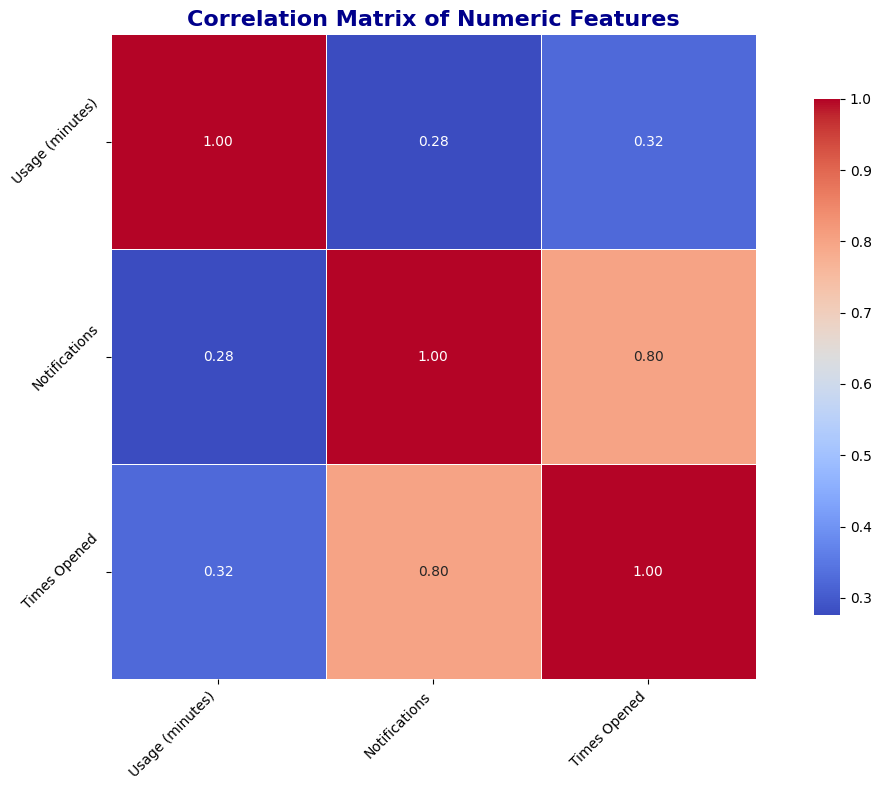

In [42]:
corelation = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corelation, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={'size': 10},
            cbar_kws={'shrink': 0.8}, square=True)

plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold', color='darkblue')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

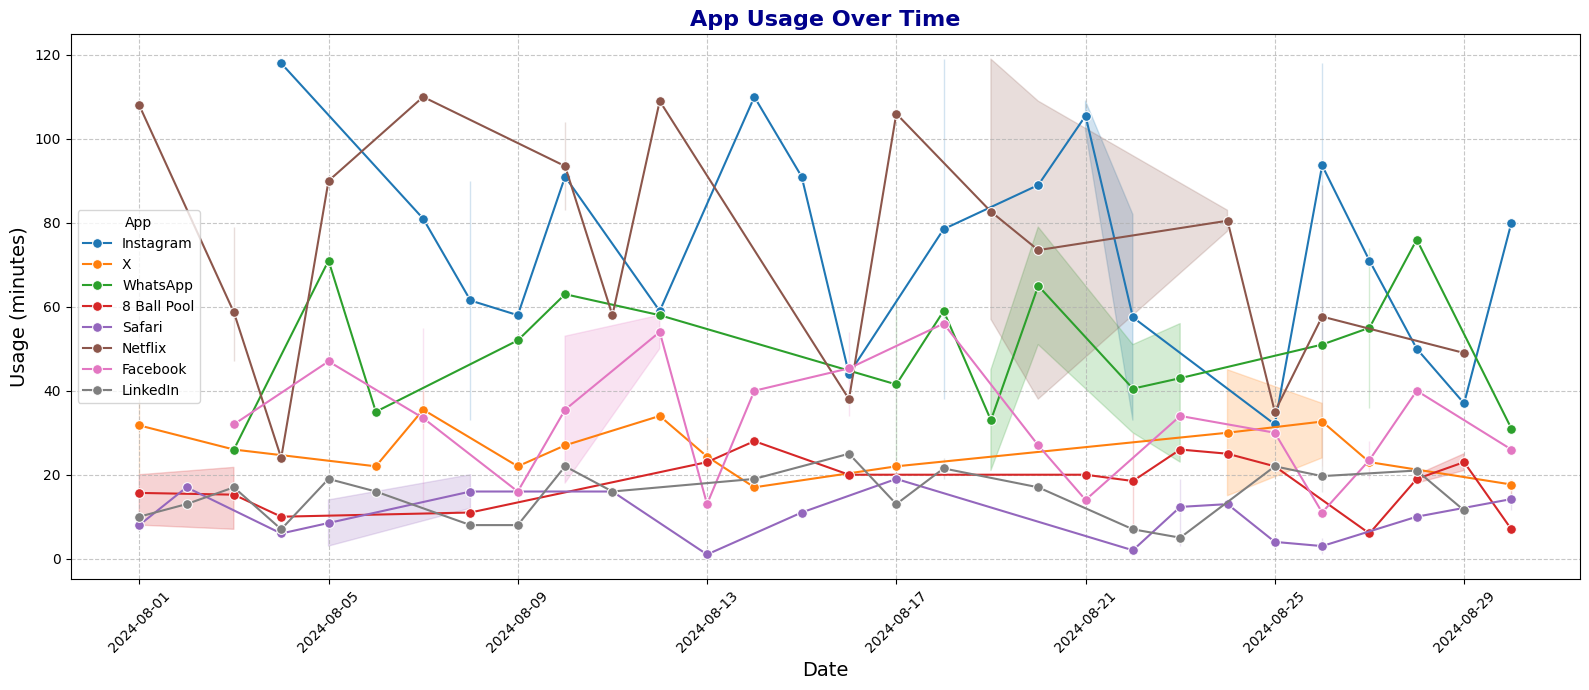

In [43]:
plt.figure(figsize=(16, 7))

sns.lineplot(x='Date', y='Usage (minutes)', hue='App', data=df, marker='o', linestyle='-', markersize=7)

plt.title('App Usage Over Time', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Usage (minutes)', fontsize=14)

plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

           App  average_usage  average_notification  average_times_opened
2    Instagram          75.92                 49.80                 41.56
4      Netflix          72.76                  0.44                  2.56
6     WhatsApp          48.16                 99.92                 68.24
1     Facebook          33.68                 39.72                 30.20
7            X          27.00                 25.84                 13.16
0  8 Ball Pool          18.08                  4.52                  7.28
3     LinkedIn          15.60                  8.92                  4.76
5       Safari          10.80                  0.72                  5.28


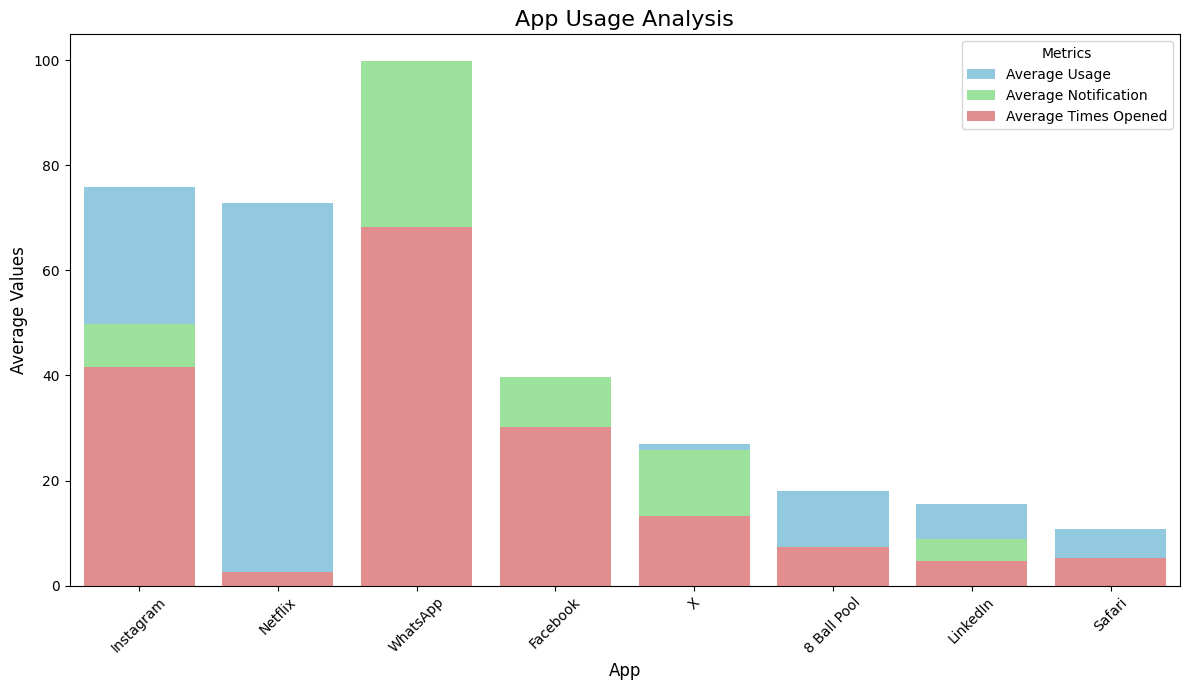

In [44]:
app_analysis = df.groupby('App').agg(
    average_usage=('Usage (minutes)', 'mean'),
    average_notification=('Notifications', 'mean'),
    average_times_opened=('Times Opened', 'mean')
).reset_index()

app_analysis = app_analysis.sort_values(by='average_usage', ascending=False)

print(app_analysis)

plt.figure(figsize=(12, 7))

sns.barplot(x='App', y='average_usage', data=app_analysis, color='skyblue', label='Average Usage')
sns.barplot(x='App', y='average_notification', data=app_analysis, color='lightgreen', label='Average Notification')
sns.barplot(x='App', y='average_times_opened', data=app_analysis, color='lightcoral', label='Average Times Opened')

plt.title('App Usage Analysis', fontsize=16)
plt.xlabel('App', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Metrics')

plt.show()

<ipython-input-45-b84383c5bc1c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day Of Week', y='Usage (minutes)', data=weekly_usage,


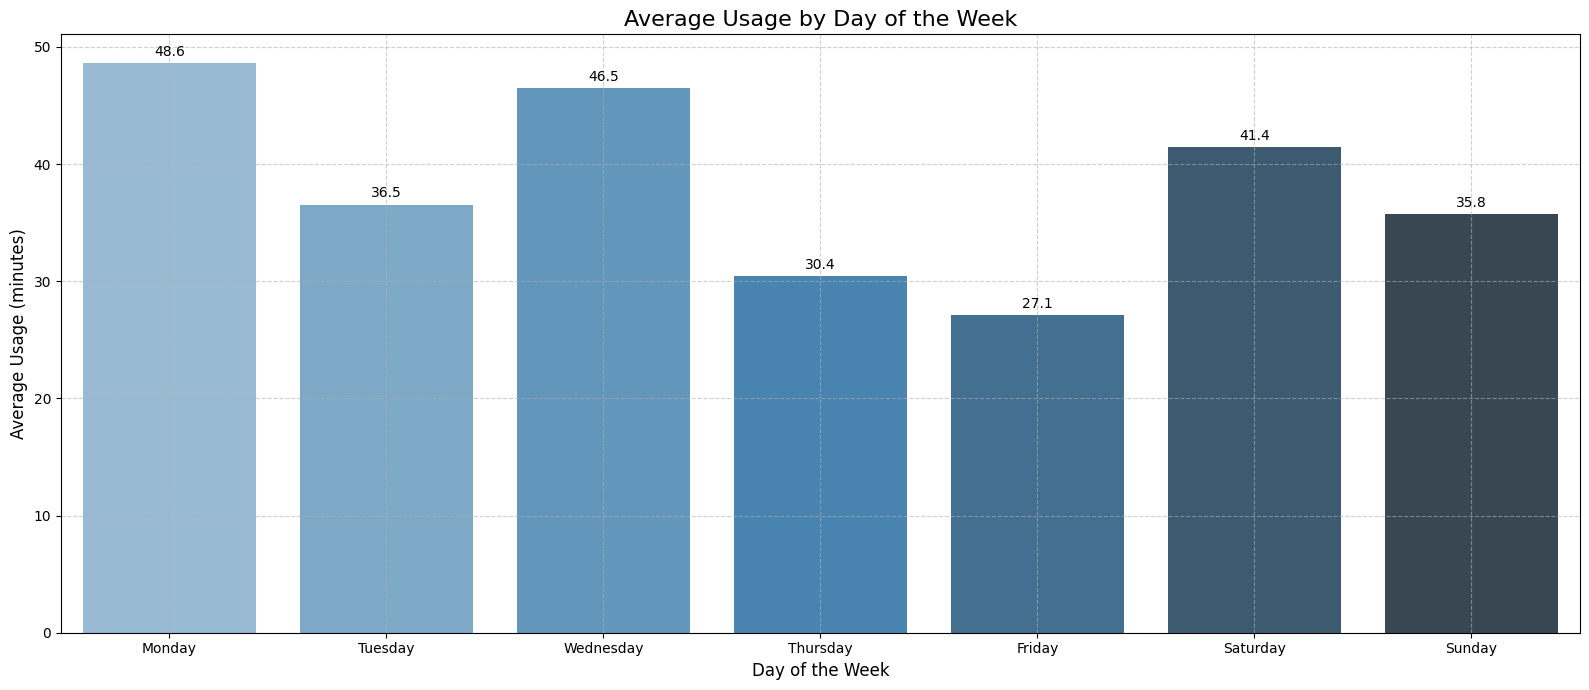

In [45]:
plt.figure(figsize=(16, 7))

weekly_usage = df.groupby('Day Of Week')['Usage (minutes)'].mean().reset_index()

sns.barplot(x='Day Of Week', y='Usage (minutes)', data=weekly_usage,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette='Blues_d')

plt.title('Average Usage by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Usage (minutes)', fontsize=12)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.1f}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center',
                           xytext=(0, 8), textcoords='offset points', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


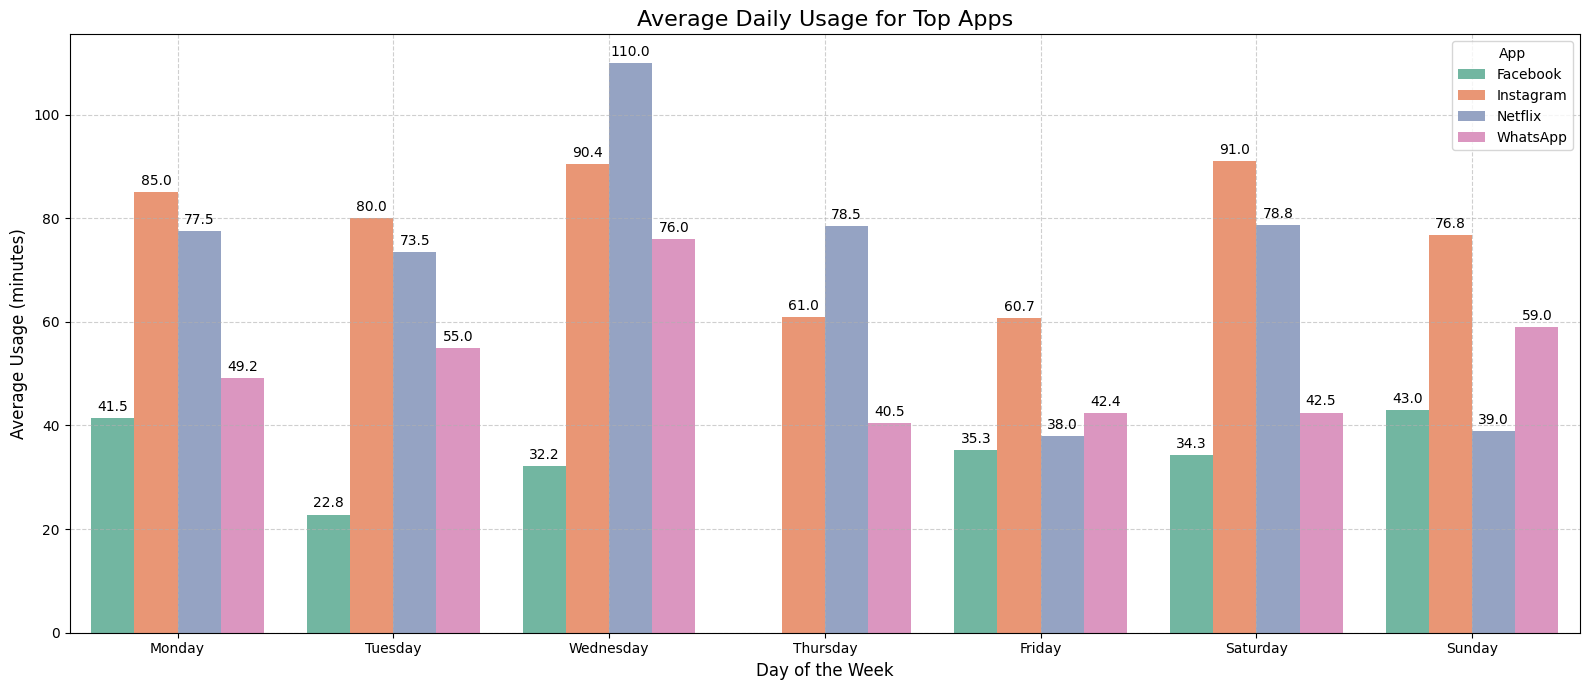

In [46]:
plt.figure(figsize=(16, 7))

sns.barplot(x='Day Of Week', y='Usage (minutes)', hue='App', data=top_apps_daily_usage,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette='Set2')

plt.title('Average Daily Usage for Top Apps', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Usage (minutes)', fontsize=12)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.1f}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center',
                           xytext=(0, 8), textcoords='offset points', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

<ipython-input-47-f8dcf7c08125>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='App', y='Opening Rate (%)', data=opening_per_notification, palette='Set2')


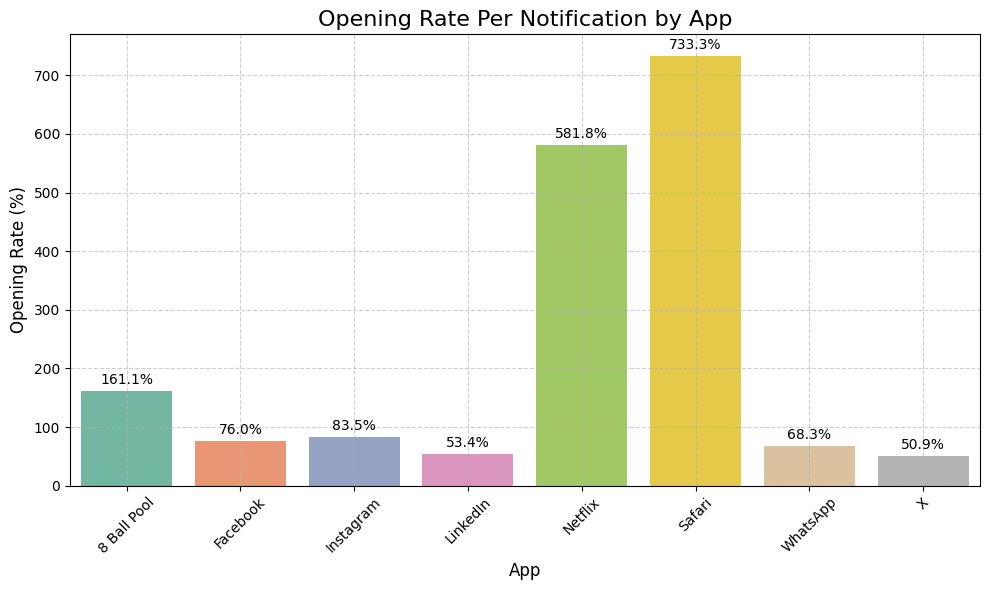

In [47]:
plt.figure(figsize=(10, 6))

sns.barplot(x='App', y='Opening Rate (%)', data=opening_per_notification, palette='Set2')

plt.title('Opening Rate Per Notification by App', fontsize=16)
plt.xlabel('App', fontsize=12)
plt.ylabel('Opening Rate (%)', fontsize=12)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{height:.1f}%',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center',
                           xytext=(0, 8), textcoords='offset points', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()